## Obtención de la función aceptancia numéricamente a partir del cálculo de la aceptancia geométrica partiendo de la definición del ángulo sólido.

**Resumen:** con el siguiente código calculamos la resolución angular y la aceptancia para el Telescopio de Muones MuTe-UIS. Además, con esta aceptancia calculada y con algunos datos de los flujos puede ser usada la fórmula de Lesparre para el cálculo de tiempos estimados de exposición para la toma de datos experimentales in situ..

In [1]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import rc
import scipy as sc
%matplotlib inline
import numpy as np
import random
np.seterr(divide='ignore', invalid='ignore')
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
from scipy.misc import imread                   # Cargo imread de scipy.misc
import math
from matplotlib import cm
import csv, operator
import scipy.stats as st
from numpy import random
import pandas as pd
from matplotlib.mlab import griddata
from numpy import *

Definiendo parámetros del MuTe: H = distancia entre las placas, h = tamaño del pixel, Np = número de pixeles.. L = 0 siempre...

In [2]:
H=200.
h=4.
Np=30.
L=0
Nd=Np**2
alphamin=np.arccos((h*Np)/(np.sqrt(2*(h*Np)**2+H**2)))
print H

200.0


Definiendo la función aceptancia a partir de la resolución angular y del ángulo sólido diferencial. Los ángulos $\alpha$ y $\beta$ son los cosenos directores para la trayectoria del muón en el detector.

In [3]:
def OmegaCal(alpha, beta, H=200, h=4, Np=30, L=0):
    Nd=Np**2
    alphamin=np.arccos((h*Np)/(np.sqrt(2*(h*Np)**2+H**2)))
    r = np.sqrt(1.-(np.cos(alpha)**2)-(np.cos(beta)**2))
    m = H*np.abs(np.cos(alpha))/(h*r)
    n = H*np.abs(np.cos(beta))/(h*r)
    S=np.abs(h**2*(Np-m)*(Np-n))
    N1=h**2*(H-L)
    D11=((H-L)**2+h**2*(m**2+n**2-n))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D12=0.5*(2*(H-L)**2+h**2*(2*m**2+2*n**2-1))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D13=((H-L)**2+h**2*(m**2+n**2-m))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D14=(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n-0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    N2=h**2*(H-L)
    D21=((H-L)**2+h**2*(m**2+n**2+n))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D22=((H-L)**2+h**2*(m**2+n**2+m))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D23=0.5*(2*(H-L)**2+h**2*(2*m**2+2*n**2-1))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D24=(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n+0.5)*h)**2))
    Omega=8*np.arctan(N1/(D11+D12+D13+D14))+8*np.arctan(N2/(D21+D22+D23+D24))
    Acep = Omega*S/4
    return Omega, Acep

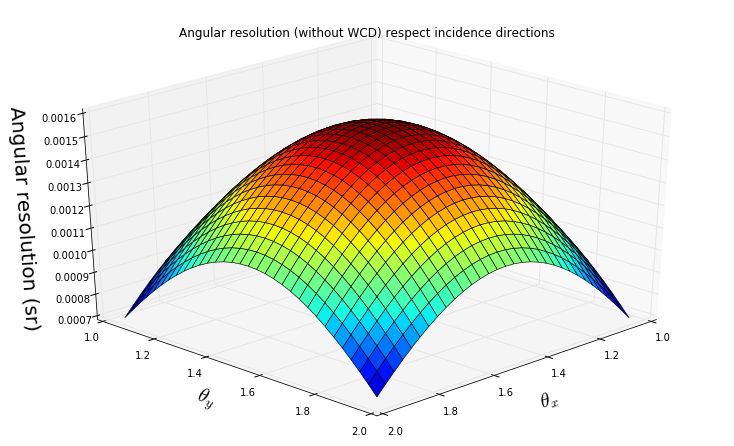

In [4]:
fig = plt.figure(num = None, figsize = (10, 6))
ax = Axes3D(fig)
ax.patch.set_alpha(0)
alpha = np.arange(alphamin, np.pi-alphamin, 0.03)
beta = np.arange(alphamin, np.pi-alphamin, 0.03)
alpha, beta = np.meshgrid(alpha, beta)
Omega, Acep = OmegaCal(alpha, beta)
ax.set_xlim3d(1, 2)
ax.set_ylim3d(1, 2)
#ax.set_zlim3d(0, 0.0011)
#ax.set_xlabel('\n' + 'xlabel', linespacing=4)
plt.title('Angular resolution (without WCD) respect incidence directions')
ax.set_xlabel('\n' + r'$\theta_x$', linespacing=1, fontsize = 20)
ax.set_ylabel('\n' + r'$\theta_y$', linespacing=1, fontsize = 20)
ax.set_zlabel('\n' + r'Angular resolution (sr)', linespacing=2, fontsize = 20)
ax.view_init(elev=30,azim=45) 
ax.dist=10
ax.plot_surface(alpha, beta, Omega, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.6, antialiased=True)
plt.savefig('angularresolution.png', bbox_inches='tight', transparent=False, dpi = 200)

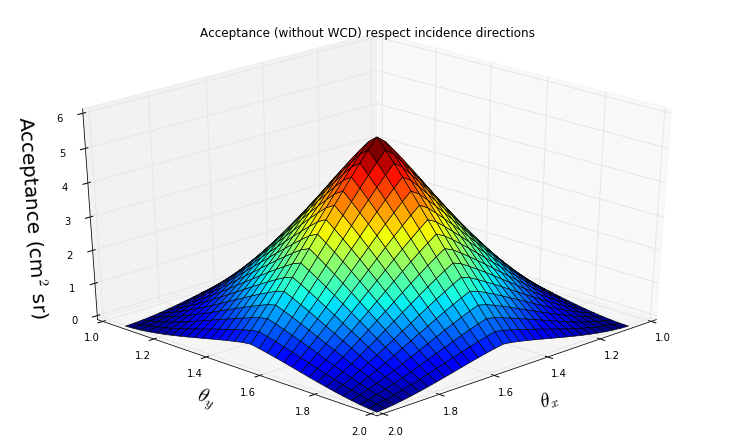

In [5]:
fig = plt.figure(num = None, figsize = (10, 6))
ax = Axes3D(fig)
alpha = np.arange(alphamin, np.pi-alphamin, 0.03)
beta = np.arange(alphamin, np.pi-alphamin, 0.03)
alpha, beta = np.meshgrid(alpha, beta)
Omega, Acep = OmegaCal(alpha, beta)
ax.set_xlim3d(1, 2)
ax.set_ylim3d(1, 2)
#ax.set_zlim3d(0, 0.0011)
plt.title('Acceptance (without WCD) respect incidence directions')
ax.set_xlabel('\n' + r'$\theta_x$', linespacing=1, fontsize = 20)
ax.set_ylabel('\n' + r'$\theta_y$', linespacing=1, fontsize = 20)
ax.set_zlabel('\n' + r'Acceptance (cm$^2$ sr)', linespacing=1, fontsize = 20)
ax.view_init(elev=30,azim=45) 
ax.dist=10
ax.plot_surface(alpha, beta, Acep, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.6, antialiased=True)
plt.savefig('acceptance.png', bbox_inches='tight', transparent=False, dpi = 200)

In [8]:
print alpha.mean(), beta.mean()
print np.median(alpha), np.var(alpha)
print Acep.mean()
alpha=alpha.mean()
beta=beta.mean()
Omega, Acep = OmegaCal(alpha, beta)
print Acep

1.5606194773 1.5606194773
1.5606194773 0.0
5.56395970868
5.56395970868


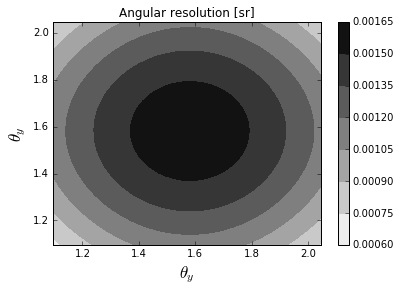

In [6]:
xlist = np.linspace(alphamin, np.pi-alphamin, 32)
ylist = np.linspace(alphamin, np.pi-alphamin, 32)
X, Y = np.meshgrid(xlist, ylist)
Z = Omega
plt.figure()
#cp=plt.imshow(Z, interpolation='None', cmap='gray_r', origin='lower')
cp = plt.contourf(X, Y, Z, cmap='gray_r', interpolation='lanczos')
plt.colorbar(cp)
plt.title(r'Angular resolution [sr]', linespacing=5, fontsize = 12) 
plt.xlabel(r'$\theta_y$', linespacing=1, fontsize = 17)        
plt.ylabel(r'$\theta_y$', linespacing=1, fontsize = 17)
plt.savefig('angresol2.png', bbox_inches='tight', transparent=False, dpi = 200)
plt.show()

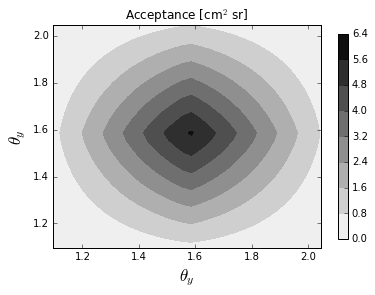

In [7]:
xlist = np.linspace(alphamin, np.pi-alphamin, 32)
ylist = np.linspace(alphamin, np.pi-alphamin, 32)
X, Y = np.meshgrid(xlist, ylist)
Z = Acep
plt.figure()
#methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
#cp=plt.imshow(Z, interpolation='None', cmap='gray_r', origin='lower')
cp = plt.contourf(X, Y, Z, cmap='gray_r', interpolation='lanczos')
plt.colorbar(cp, shrink=.92)
plt.title(r'Acceptance [cm$^{2}$ sr]', linespacing=5, fontsize = 12) 
plt.xlabel(r'$\theta_y$', linespacing=1, fontsize = 17)        
plt.ylabel(r'$\theta_y$', linespacing=1, fontsize = 17)
plt.savefig('accept2.png', bbox_inches='tight', transparent=False, dpi = 200)
plt.show()

Ahora calculamos los máximos de la resolución angular y de la aceptancia respectivamente...

In [8]:
alpha=np.pi/2
beta=np.pi/2
print alpha
Omega, Acep = OmegaCal(alpha, beta)
print 'Para el caso de nuestro telescopio MuTe, tenemos que:'
print 'Omega(max)=', Omega
print 'Acep(max)=', Acep

1.57079632679
Para el caso de nuestro telescopio MuTe, tenemos que:
Omega(max)= 0.00159984001866
Acep(max)= 5.75942406719


In [9]:
D=arange(100,290,10)
Ost=np.array([0.00639, 0.00528, 0.00444, 0.00378, 0.00326, 0.00284, 0.00249, 0.00221, 0.00197, 0.00177, 
            0.00159, 0.001455, 0.00132, 0.00120, 0.00111, 0.00102, 0.00094, 0.00087, 0.00081])
Ast=np.array([23.03, 19.03, 15.99, 13.62, 11.75, 10.23, 8.99, 7.97, 7.11, 6.38, 
            5.75, 5.22, 4.75, 4.35, 3.99, 3.68, 3.40, 3.16, 2.93])
Oct=np.array([0.00132, 0.00120, 0.00111, 0.00102, 0.00094, 0.00087, 0.00081, 0.00076, 0.00071, 0.00066,
             0.00062, 0.00058, 0.00055, 0.00052, 0.00049, 0.00046, 0.00044, 0.00042, 0.00039])
Act=np.array([4.75, 4.35, 3.99, 3.68, 3.40, 3.16, 2.93, 2.73, 2.55, 2.39,
             2.24, 2.11, 1.99, 1.88, 1.77, 1.68, 1.59, 1.51, 1.43])
print D, Ost, Ast

[100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270
 280] [ 0.00639   0.00528   0.00444   0.00378   0.00326   0.00284   0.00249
  0.00221   0.00197   0.00177   0.00159   0.001455  0.00132   0.0012
  0.00111   0.00102   0.00094   0.00087   0.00081 ] [ 23.03  19.03  15.99  13.62  11.75  10.23   8.99   7.97   7.11   6.38
   5.75   5.22   4.75   4.35   3.99   3.68   3.4    3.16   2.93]


In [10]:
shape(Ost)

(19,)

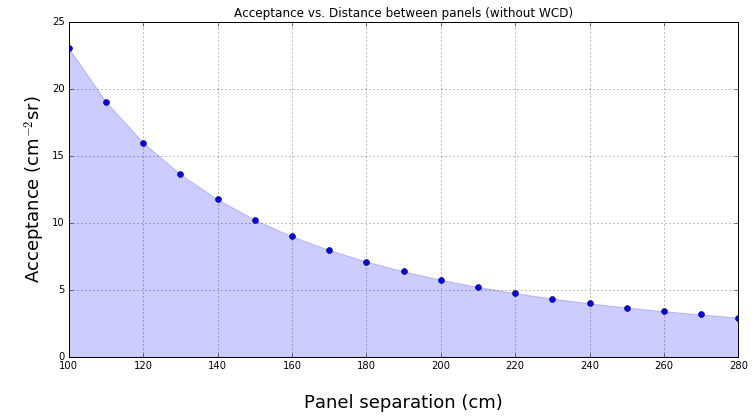

In [11]:
plt.figure(figsize=(12,6))
plt.title('Acceptance vs. Distance between panels (without WCD)')
plt.xlabel('\n' + r'Panel separation (cm)', linespacing=1, fontsize = 18)
plt.ylabel('\n' + r'Acceptance (cm$^{-2}$sr)', linespacing=1, fontsize = 18)
plt.grid(True)
plt.fill_between(D, Ast, 0, color='b',alpha=.2)
plt.plot(D, Ast, 'bo')
plt.savefig('AceptanvsDst.png', dpi=200)

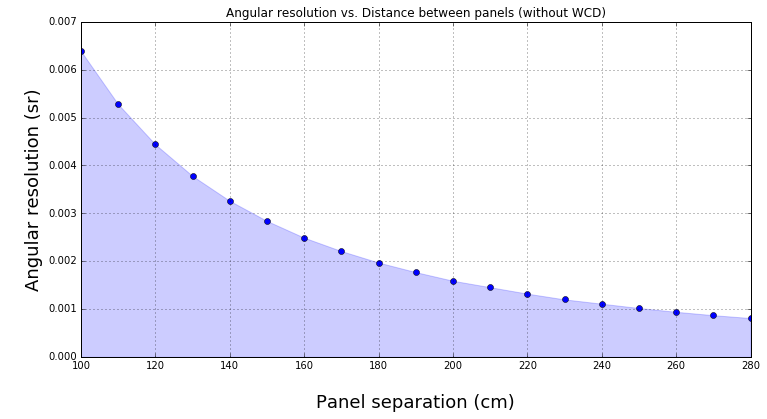

In [12]:
plt.figure(figsize=(12,6))
plt.title('Angular resolution vs. Distance between panels (without WCD)')
plt.xlabel('\n' + r'Panel separation (cm)', linespacing=1, fontsize = 18)
plt.ylabel('\n' + r'Angular resolution (sr)', linespacing=1, fontsize = 18)
plt.grid(True)
plt.fill_between(D, Ost, 0, color='b',alpha=.2)
plt.plot(D, Ost, 'bo')
plt.savefig('AngResvdDst.png', dpi=200)

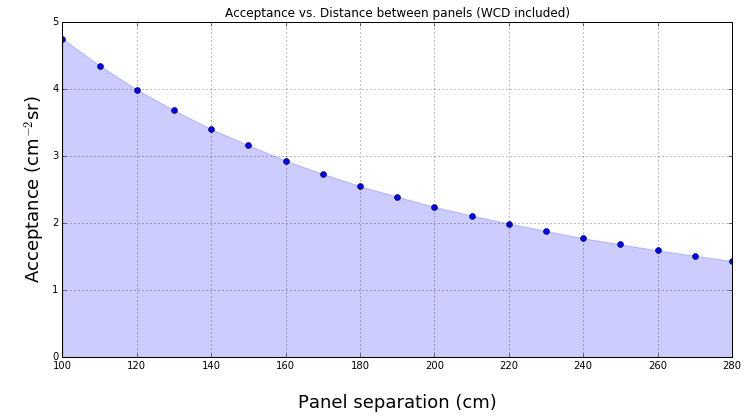

In [13]:
plt.figure(figsize=(12,6))
plt.title('Acceptance vs. Distance between panels (WCD included)')
plt.xlabel('\n' + r'Panel separation (cm)', linespacing=1, fontsize = 18)
plt.ylabel('\n' + r'Acceptance (cm$^{-2}$sr)', linespacing=1, fontsize = 18)
plt.grid(True)
plt.fill_between(D, Act, 0, color='b',alpha=.2)
plt.plot(D, Act, 'bo')
plt.savefig('AceptanvsDct.png', dpi=200)

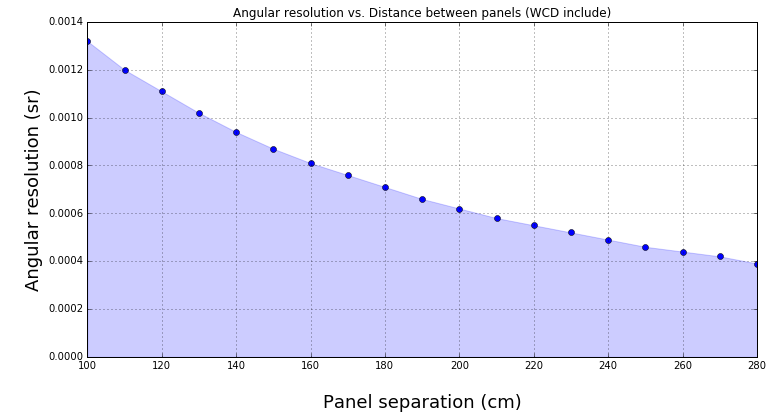

In [14]:
plt.figure(figsize=(12,6))
plt.title('Angular resolution vs. Distance between panels (WCD include)')
plt.xlabel('\n' + r'Panel separation (cm)', linespacing=1, fontsize = 18)
plt.ylabel('\n' + r'Angular resolution (sr)', linespacing=1, fontsize = 18)
plt.grid(True)
plt.fill_between(D, Oct, 0, color='b',alpha=.2)
plt.plot(D, Oct, 'bo')
plt.savefig('AngResvdDct.png', dpi=200)

In [15]:
H=200.
h=4.
Np=30.
L=-120
Nd=Np**2
alphamin=np.arccos((h*Np)/(np.sqrt(2*(h*Np)**2+H**2)))
print H

200.0


In [16]:
def OmegaCal(alpha, beta, H=200, h=4, Np=30, L=-120):
    Nd=Np**2
    alphamin=np.arccos((h*Np)/(np.sqrt(2*(h*Np)**2+H**2)))
    r = np.sqrt(1.-(np.cos(alpha)**2)-(np.cos(beta)**2))
    m = H*np.abs(np.cos(alpha))/(h*r)
    n = H*np.abs(np.cos(beta))/(h*r)
    S=np.abs(h**2*(Np-m)*(Np-n))
    N1=h**2*(H-L)
    D11=((H-L)**2+h**2*(m**2+n**2-n))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D12=0.5*(2*(H-L)**2+h**2*(2*m**2+2*n**2-1))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D13=((H-L)**2+h**2*(m**2+n**2-m))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D14=(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n-0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    N2=h**2*(H-L)
    D21=((H-L)**2+h**2*(m**2+n**2+n))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D22=((H-L)**2+h**2*(m**2+n**2+m))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D23=0.5*(2*(H-L)**2+h**2*(2*m**2+2*n**2-1))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D24=(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n+0.5)*h)**2))
    Omega=8*np.arctan(N1/(D11+D12+D13+D14))+8*np.arctan(N2/(D21+D22+D23+D24))
    Acep = Omega*S/4
    return Omega, Acep

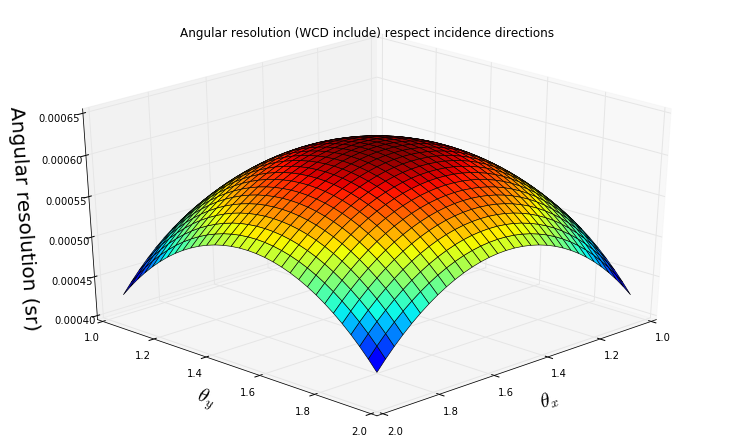

In [17]:
fig = plt.figure(num = None, figsize = (10, 6))
ax = Axes3D(fig)
ax.patch.set_alpha(0)
alpha = np.arange(alphamin, np.pi-alphamin, 0.03)
beta = np.arange(alphamin, np.pi-alphamin, 0.03)
alpha, beta = np.meshgrid(alpha, beta)
Omega, Acep = OmegaCal(alpha, beta)
ax.set_xlim3d(1, 2)
ax.set_ylim3d(1, 2)
#ax.set_zlim3d(0, 0.0011)
#ax.set_xlabel('\n' + 'xlabel', linespacing=4)
plt.title('Angular resolution (WCD include) respect incidence directions')
ax.set_xlabel('\n' + r'$\theta_x$', linespacing=1, fontsize = 20)
ax.set_ylabel('\n' + r'$\theta_y$', linespacing=1, fontsize = 20)
ax.set_zlabel('\n' + r'Angular resolution (sr)', linespacing=2, fontsize = 20)
ax.view_init(elev=30,azim=45) 
ax.dist=10
ax.plot_surface(alpha, beta, Omega, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.6, antialiased=True)
plt.savefig('angularresolution2.png', bbox_inches='tight', transparent=False, dpi = 200)

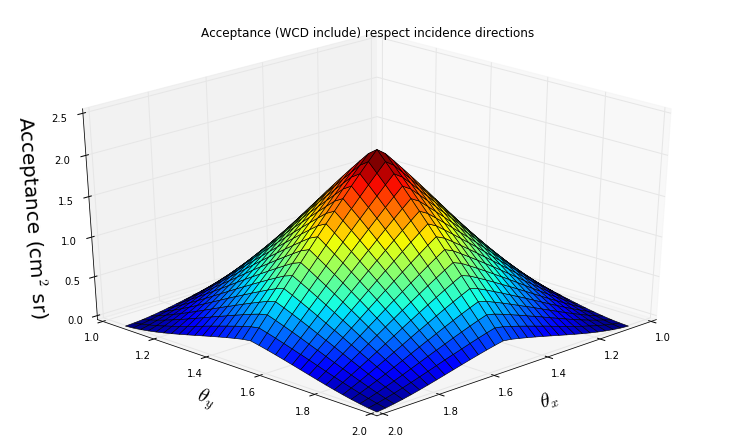

In [18]:
fig = plt.figure(num = None, figsize = (10, 6))
ax = Axes3D(fig)
alpha = np.arange(alphamin, np.pi-alphamin, 0.03)
beta = np.arange(alphamin, np.pi-alphamin, 0.03)
alpha, beta = np.meshgrid(alpha, beta)
Omega, Acep = OmegaCal(alpha, beta)
ax.set_xlim3d(1, 2)
ax.set_ylim3d(1, 2)
#ax.set_zlim3d(0, 0.0011)
plt.title('Acceptance (WCD include) respect incidence directions')
ax.set_xlabel('\n' + r'$\theta_x$', linespacing=1, fontsize = 20)
ax.set_ylabel('\n' + r'$\theta_y$', linespacing=1, fontsize = 20)
ax.set_zlabel('\n' + r'Acceptance (cm$^2$ sr)', linespacing=1, fontsize = 20)
ax.view_init(elev=30,azim=45) 
ax.dist=10
ax.plot_surface(alpha, beta, Acep, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.6, antialiased=True)
plt.savefig('acceptance2.png', bbox_inches='tight', transparent=False, dpi = 200)